In [1]:
# pip install leaf_audio tensorflow tensorflow_datasets matplotlib numpy==1.19.5

import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# tf.keras.backend.set_floatx('float64')
# import tensorflow_datasets as tfds
from deep_audio import Visualization, Audio
import leaf_audio.frontend as frontend
import matplotlib.pyplot as plt


leaf = frontend.Leaf()
melfbanks = frontend.MelFilterbanks()
tfbanks = frontend.TimeDomainFilterbanks()
sincnet = frontend.SincNet()
sincnet_plus = frontend.SincNetPlus()

In [2]:
# dataset = iter(tfds.load('speech_commands', split='train', shuffle_files=True))
# # Audio is in int16, we rescale it to [-1; 1].
# audio_sample = next(dataset)['audio'] / tf.int16.max
# audio_sample = audio_sample[tf.newaxis, :]

In [3]:
signal, rate = Audio.read("./archive/VCTK-Corpus/VCTK-Corpus/wav48/p225/p225_025.wav")
signal = signal[tf.newaxis, :]

In [4]:
import numpy as np

In [5]:
leaf_representation = leaf(signal)
leaf_representation = np.array(leaf_representation).T

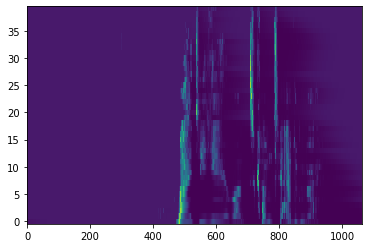

In [6]:
plt.imshow(leaf_representation,
           origin='lower',
           aspect='auto',
           cmap='viridis',
           interpolation='nearest')

In [7]:
melfbanks_representation = melfbanks(signal)
melfbanks_representation = np.array(melfbanks_representation).T

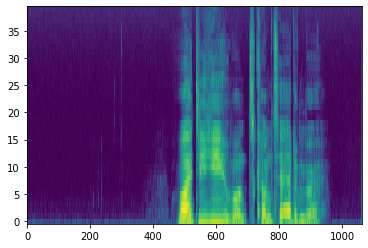

In [8]:
plt.imshow(melfbanks_representation,
           origin='lower',
           aspect='auto',
           cmap='viridis',
           interpolation='nearest')

In [9]:
import librosa
import scipy

n_mfcc = 13
n_mels = 26
n_fft = 2048
# Janela e overlapping (em amostras)
hop_length = 512
win_length = 1024
# Janela e overlapping (em tempo)
win_len = win_length / rate
win_hop = hop_length / rate
lifter = 22
dct_type = 2
norm = 'ortho'
fmin = 0
fmax = rate / 2
coef_pre_enfase = 0.97
append_Energy = 0

In [10]:
signal, rate = Audio.read("./archive/VCTK-Corpus/VCTK-Corpus/wav48/p225/p225_025.wav")

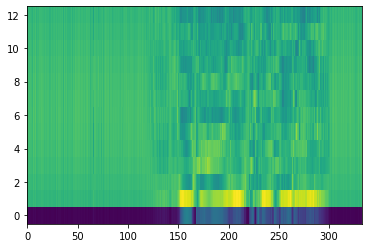

In [11]:
mfcc = librosa.feature.mfcc(signal, rate, n_mfcc=n_mfcc, n_fft=n_fft, win_length=hop_length, dct_type=2,
                                    norm='ortho', window=scipy.signal.windows.hann, hop_length=hop_length,
                                    lifter=lifter, fmin=fmin, fmax=fmax)

plt.imshow(mfcc,
           origin='lower',
           aspect='auto',
           cmap='viridis',
           interpolation='nearest')